In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

In [2]:
df = pd.read_csv('Book1.csv')
df

,Date,1,2,3,4,5,6,7,8,9,...,7723955,30369354,34703847,36200067,36671067,37052366,38834077,39168240,39379024,Grand Total
0,22-Mar,NaN,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92
1,23-Mar,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
2,24-Mar,208.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126
3,25-Mar,68.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
4,26-Mar,46.0,48.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3-Oct,NaN,47.0,NaN,NaN,26.0,28.0,74.0,NaN,25.0,...,NaN,30.0,NaN,67.0,39.0,28.0,27.0,116.0,34.0,42
1287,4-Oct,NaN,30.0,NaN,NaN,18.0,21.0,104.0,NaN,21.0,...,NaN,25.0,6.0,40.0,30.0,28.0,23.0,61.0,NaN,32
1288,5-Oct,NaN,30.0,NaN,NaN,17.0,20.0,75.0,NaN,18.0,...,NaN,24.0,NaN,37.0,29.0,23.0,20.0,67.0,NaN,31
1289,6-Oct,NaN,26.0,NaN,NaN,13.0,18.0,35.0,NaN,18.0,...,NaN,22.0,NaN,26.0,26.0,23.0,19.0,34.0,NaN,24


In [3]:
df['Date'] = pd.date_range(start='2017-03-22', periods= len(df), freq='D')

In [4]:
df.set_index('Date', inplace=True)

In [5]:
df

,1,2,3,4,5,6,7,8,9,10,...,7723955,30369354,34703847,36200067,36671067,37052366,38834077,39168240,39379024,Grand Total
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-22,NaN,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92
2017-03-23,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85
2017-03-24,208.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126
2017-03-25,68.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
2017-03-26,46.0,48.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,NaN,47.0,NaN,NaN,26.0,28.0,74.0,NaN,25.0,NaN,...,NaN,30.0,NaN,67.0,39.0,28.0,27.0,116.0,34.0,42
2020-09-29,NaN,30.0,NaN,NaN,18.0,21.0,104.0,NaN,21.0,NaN,...,NaN,25.0,6.0,40.0,30.0,28.0,23.0,61.0,NaN,32
2020-09-30,NaN,30.0,NaN,NaN,17.0,20.0,75.0,NaN,18.0,NaN,...,NaN,24.0,NaN,37.0,29.0,23.0,20.0,67.0,NaN,31


In [6]:
missing_data = df.drop(columns=['Grand Total']).isna().mean()
stable_sensors = missing_data[missing_data<0.10].index.tolist()
print(f'stable sensors are {stable_sensors}')

stable sensors are ['2', '5', '6', '9', '12']


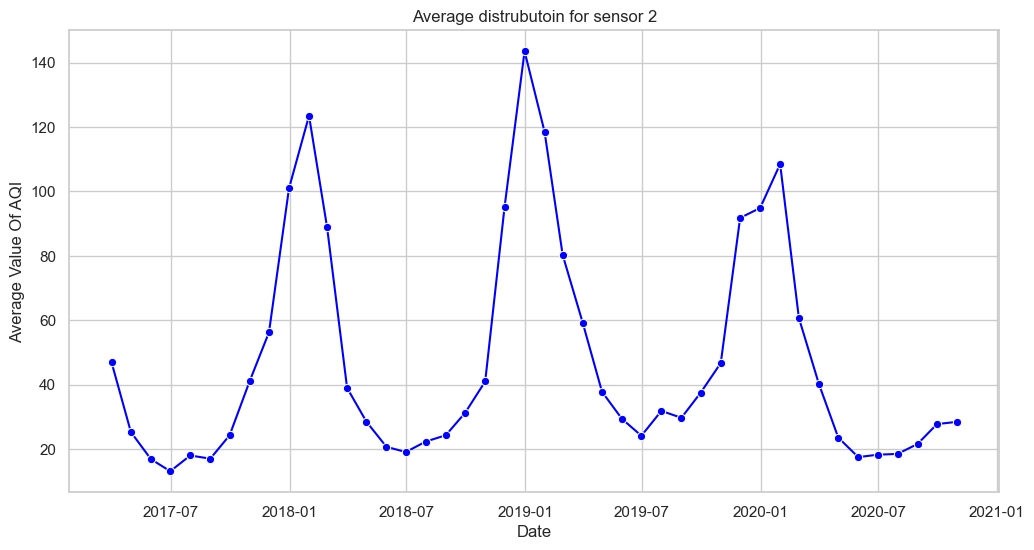

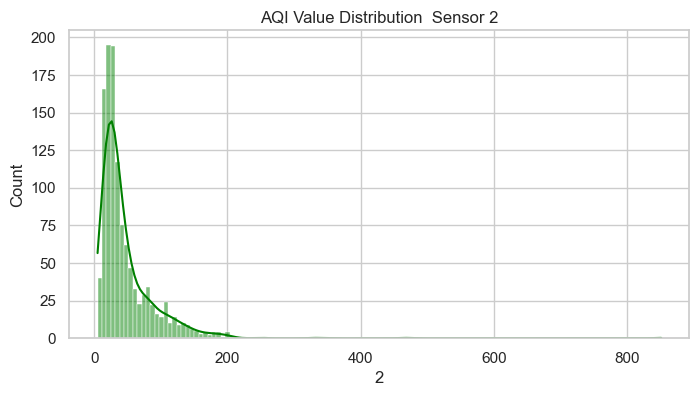

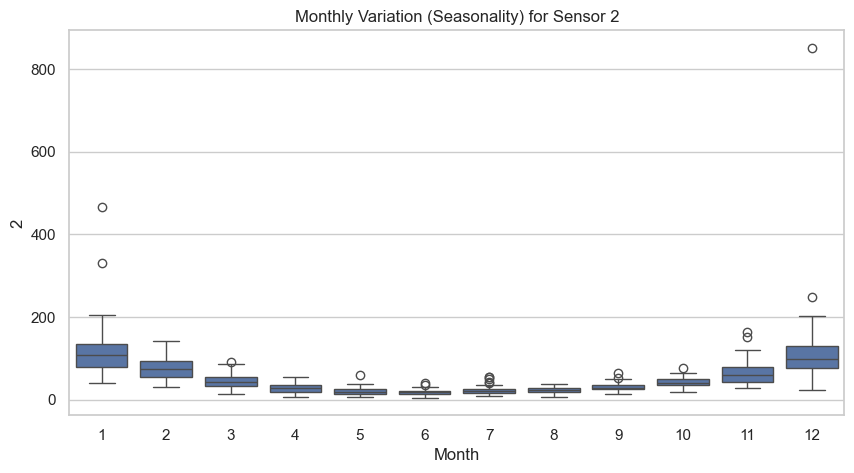

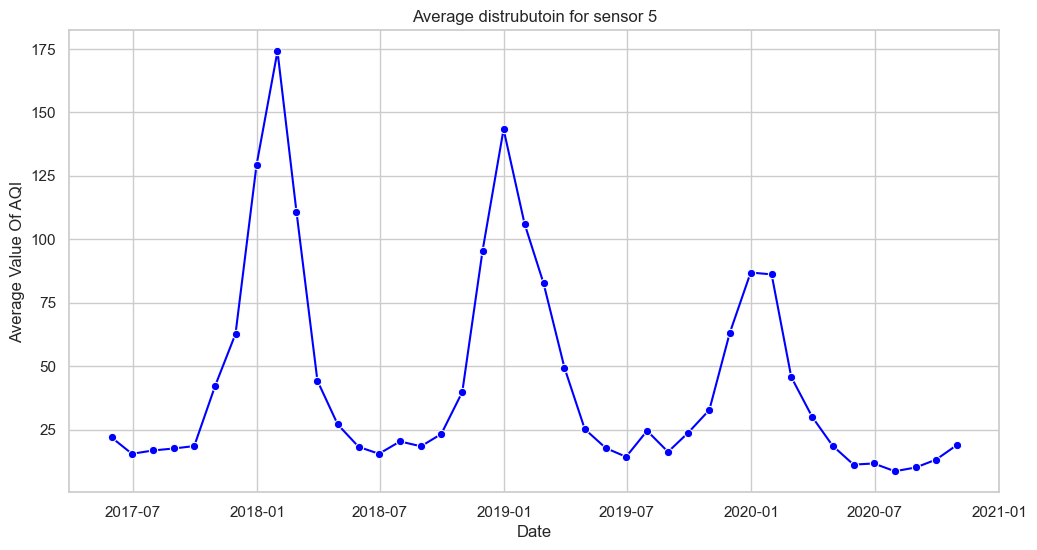

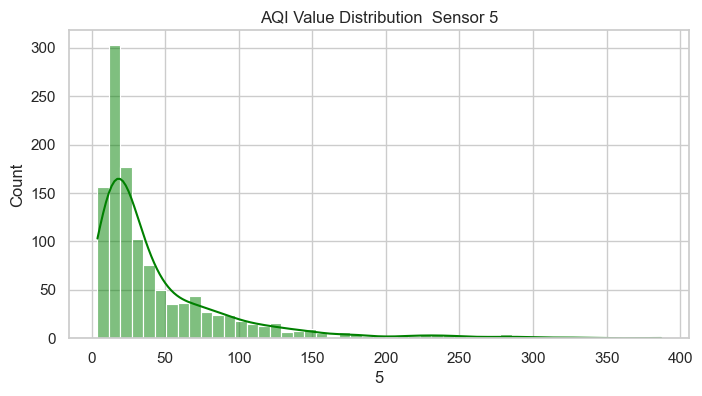

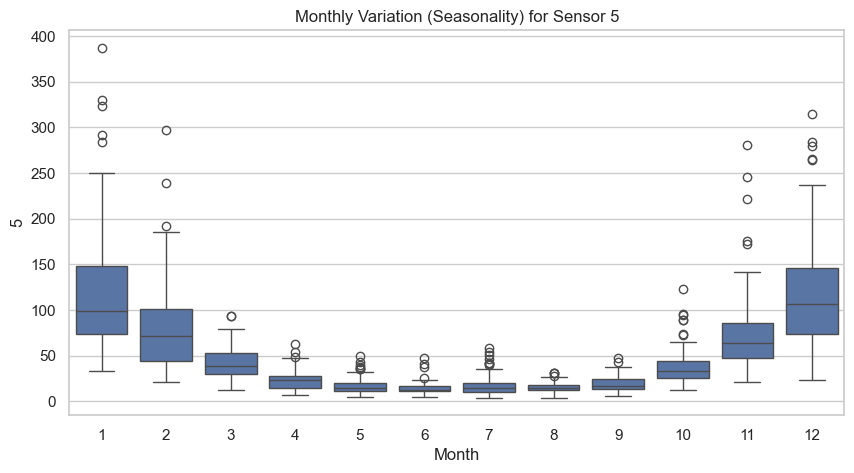

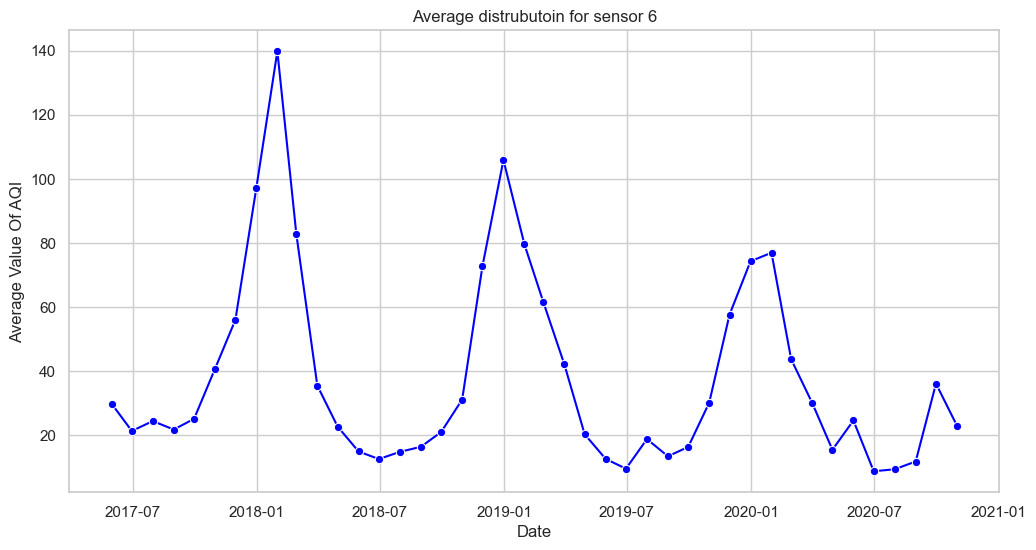

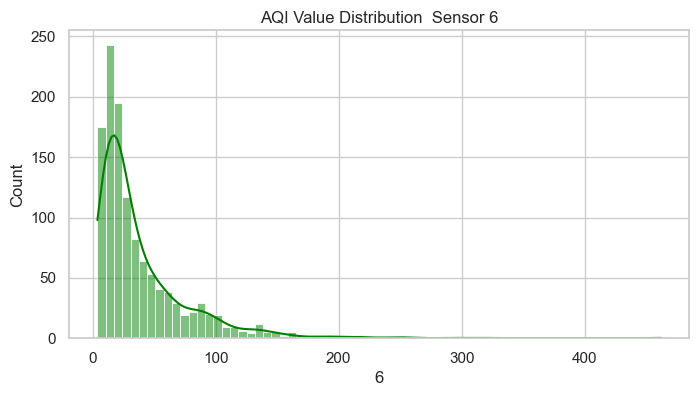

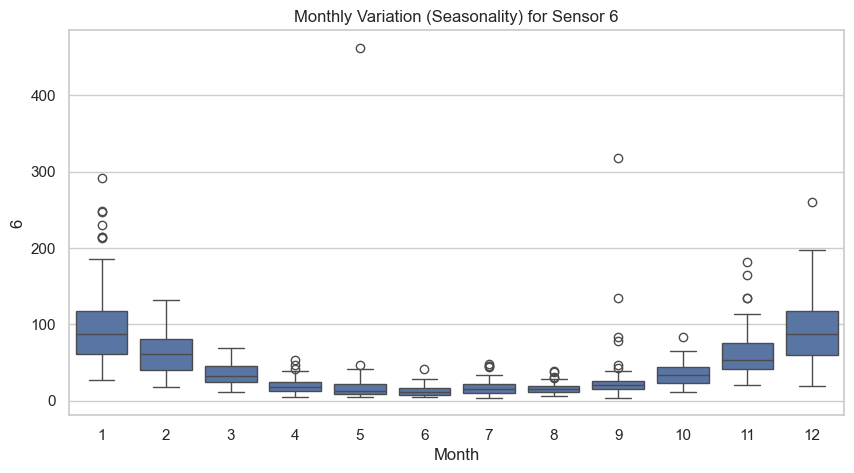

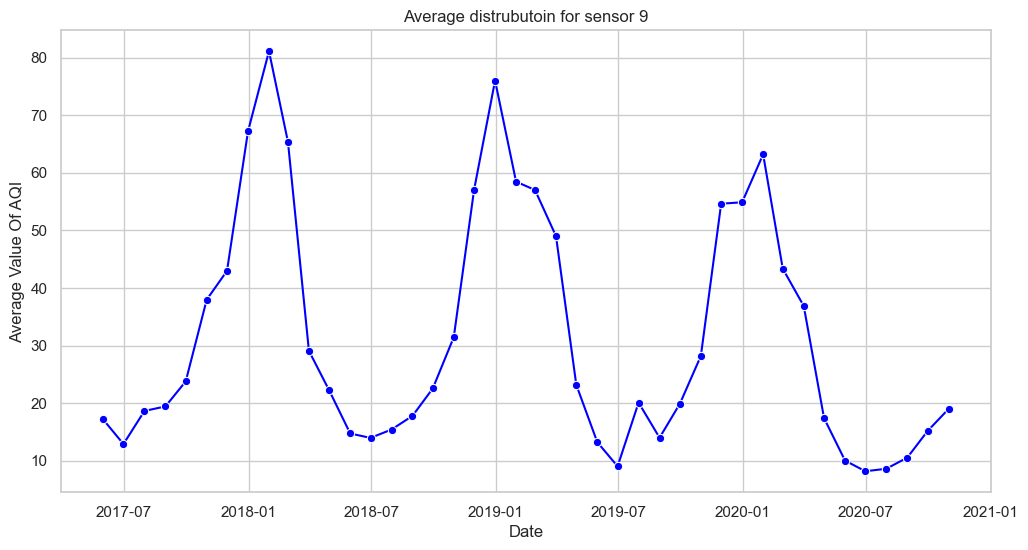

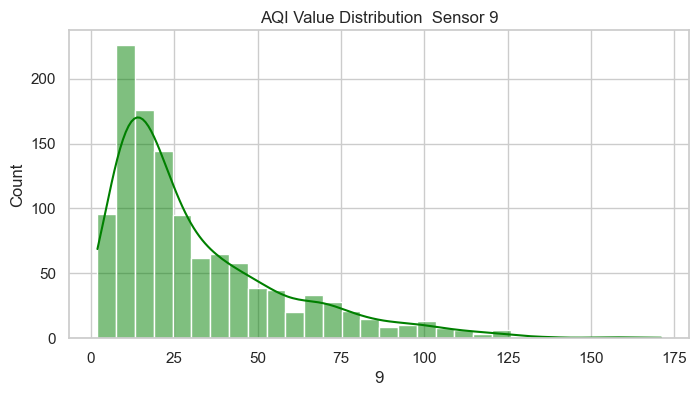

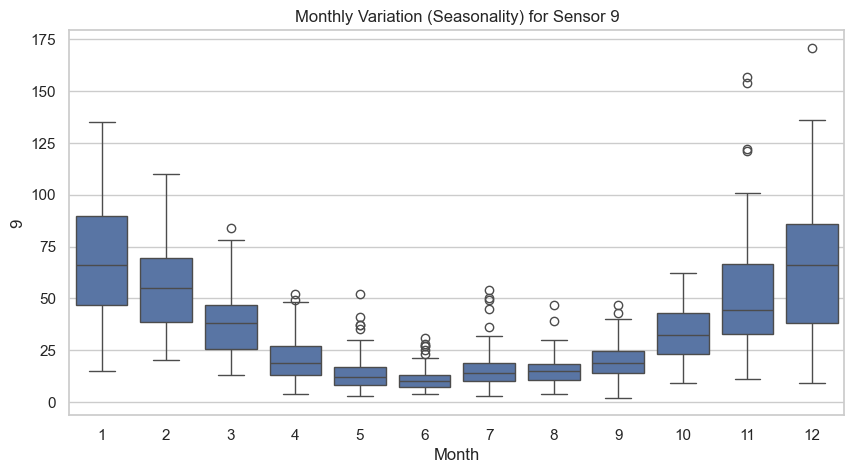

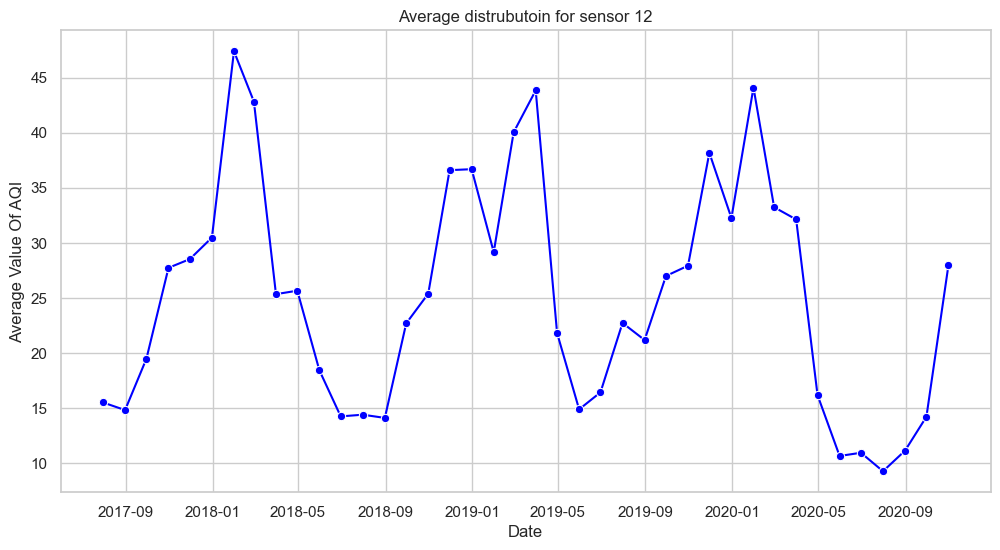

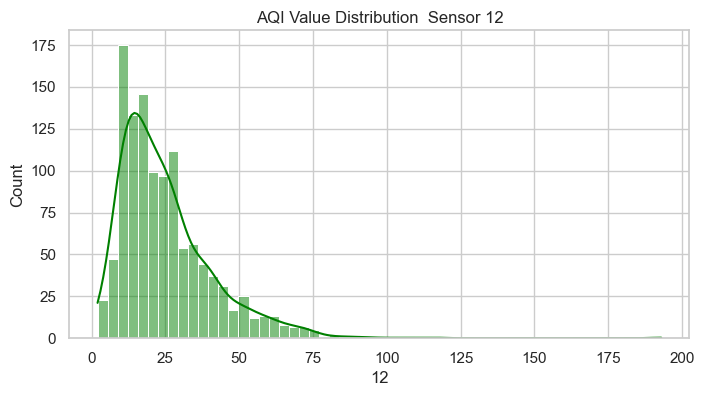

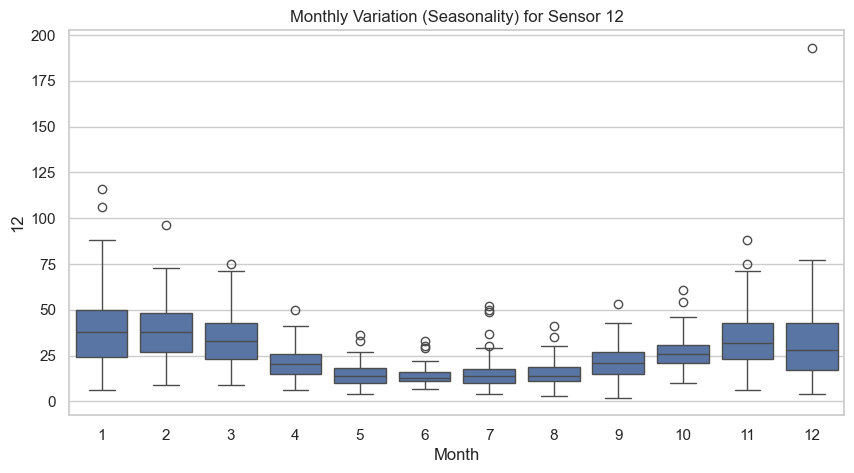

In [7]:
sns.set(style="whitegrid")
for sensor in stable_sensors:

    df_clean = df.dropna(subset=[sensor])
    df_resampled = df_clean[sensor].resample('ME').mean()


    '''monthly_aqi = df_clean.resample('ME').sum()

    plt.figure(figsize=(10, 6))
    plt.plot(monthly_aqi[sensor], c='red')
    plt.title("Monthly AQI")
    plt.xlabel("Date")
    plt.ylabel("AQI")'''


    plt.figure(figsize=(12, 6))
    # Plot the resampled data
    sns.lineplot(data=df_resampled, color='blue', marker='o')

    plt.title(f'Average distrubutoin for sensor {sensor}')
    plt.xlabel('Date')
    plt.ylabel('Average Value Of AQI')

    #distrubution 
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean[sensor], kde=True, color='green')
    plt.title(f'AQI Value Distribution  Sensor {sensor}')

    #boxplot 
    temp_df = df_clean[[sensor]].copy()
    temp_df['Month'] = temp_df.index.month

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=temp_df, x='Month', y=sensor)
    plt.title(f'Monthly Variation (Seasonality) for Sensor {sensor}')

    plt.show()

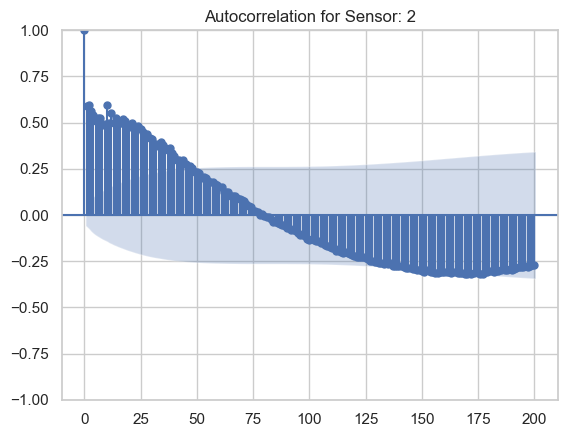

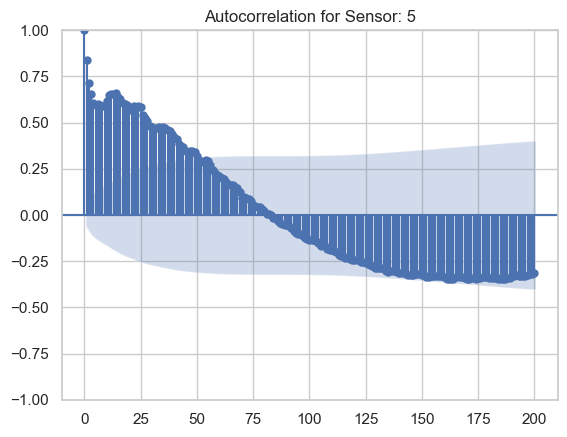

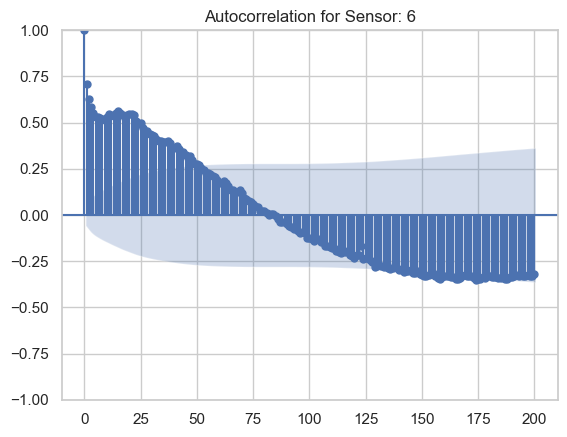

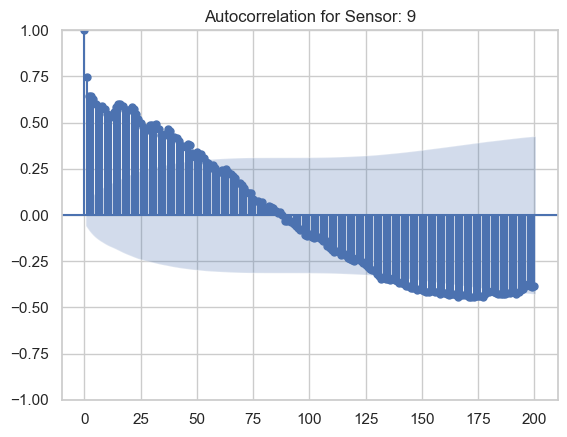

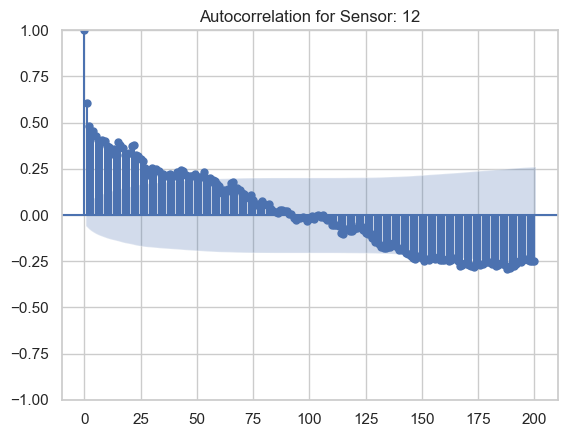

In [8]:
for sensor in stable_sensors:
    sensor_data = df[sensor].dropna()
    plot_acf(sensor_data, lags=200)
    plt.title(f"Autocorrelation for Sensor: {sensor}")
    plt.show()

## The ACF plot exhibits a sinusoidal decay, which indicates strong seasonal periodicity in the AQI levels. This suggests that the data does not just depend on the immediate past, but repeats a structural pattern over a specific cycle (e.g., annual or daily

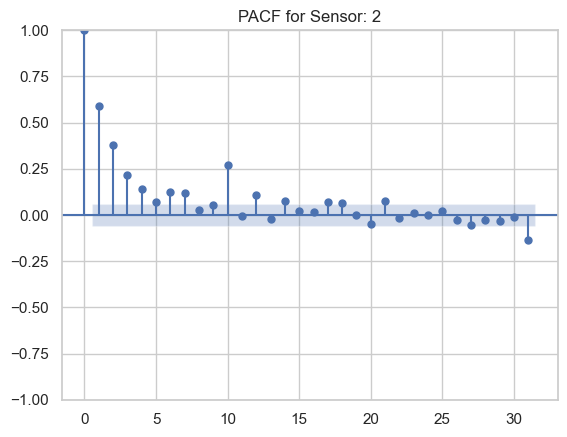

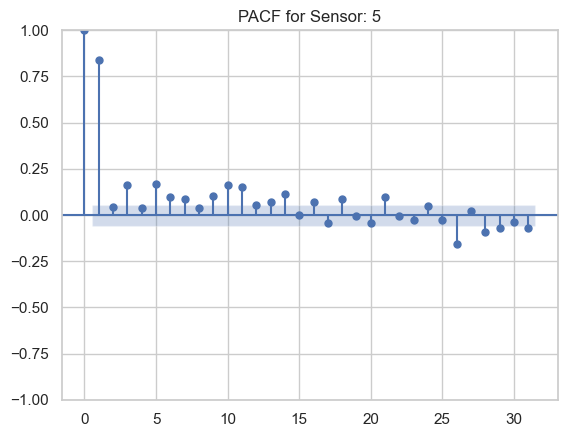

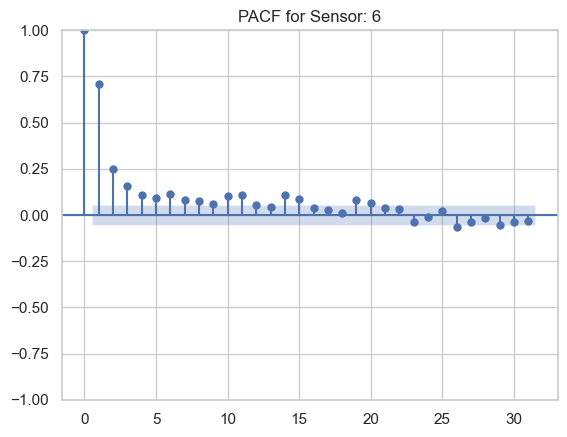

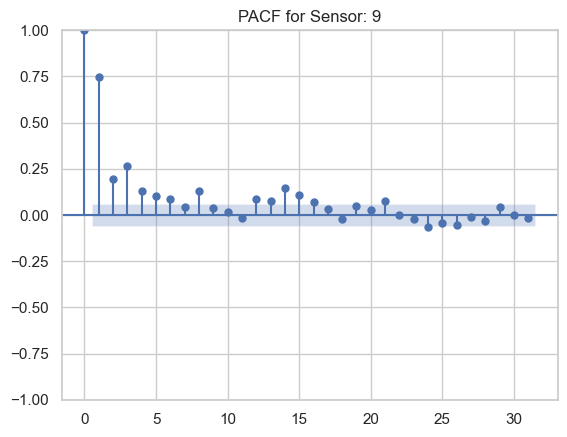

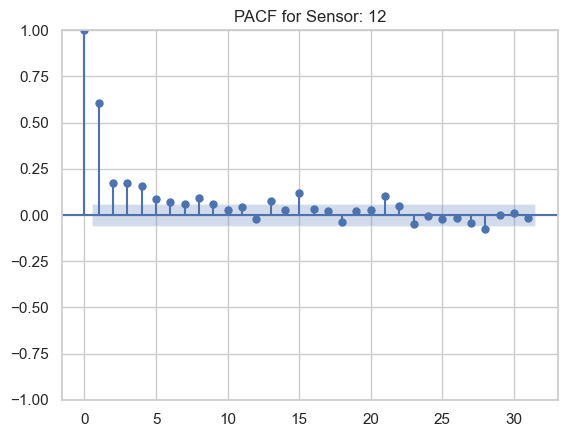

In [9]:
for sensor in stable_sensors:
    sensor_data = df[sensor].dropna()
    plot_pacf(sensor_data)
    plt.title(f"PACF for Sensor: {sensor}")
    plt.show()

## in this plots we can see "AR" (AutoRegressive) and based of plot we can start from lags 1, 2

--- Errors for Sensor 2 ---
MAE:  21.63
RMSE: 24.41
MAPE: 63.98%
--------------------------------------


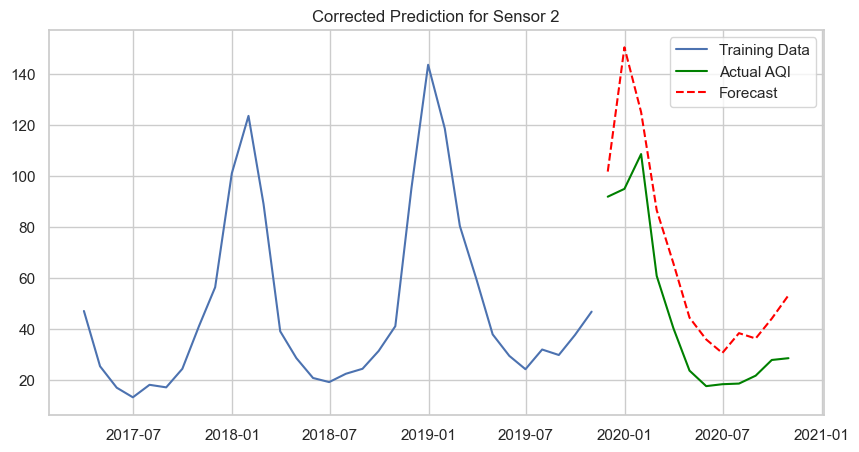

--- Errors for Sensor 5 ---
MAE:  16.11
RMSE: 22.15
MAPE: 51.01%
--------------------------------------


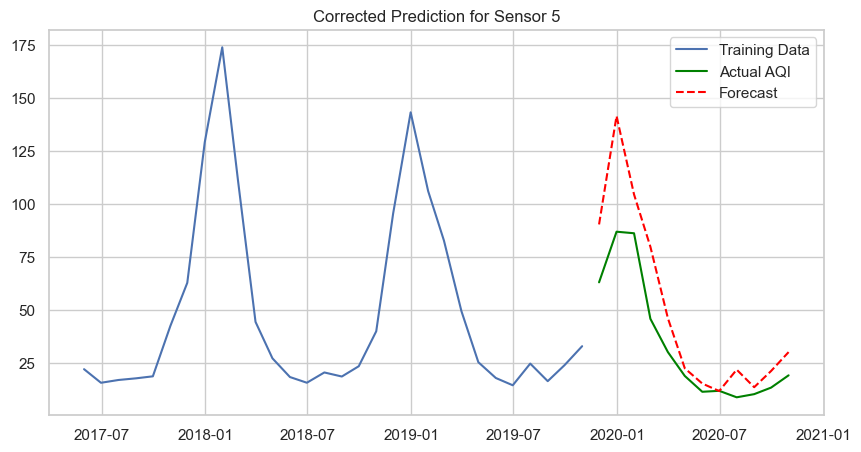

--- Errors for Sensor 6 ---
MAE:  9.54
RMSE: 12.57
MAPE: 33.02%
--------------------------------------


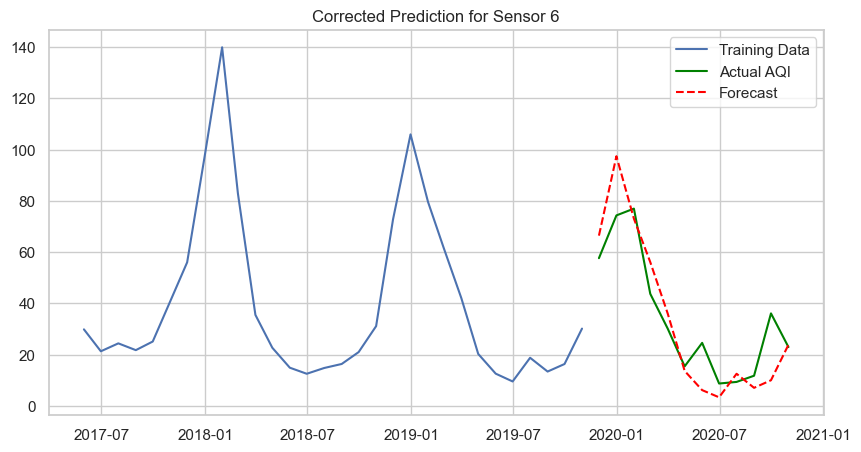

--- Errors for Sensor 9 ---
MAE:  7.59
RMSE: 9.59
MAPE: 33.49%
--------------------------------------


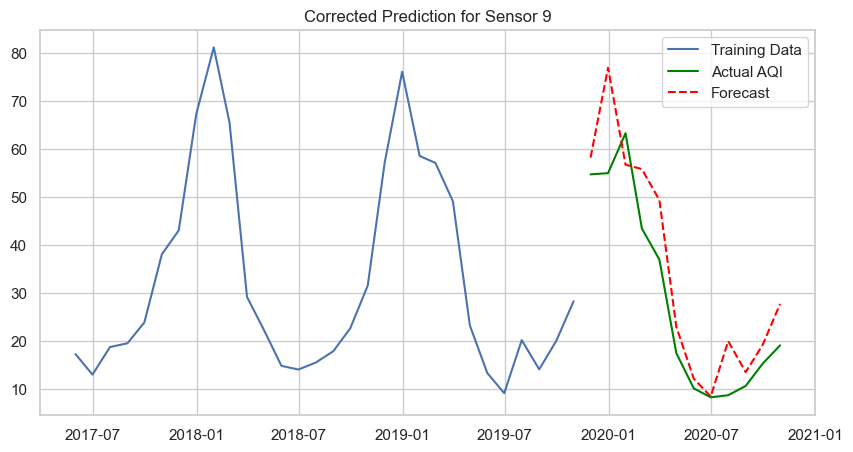

--- Errors for Sensor 12 ---
MAE:  10.48
RMSE: 11.43
MAPE: 65.98%
--------------------------------------


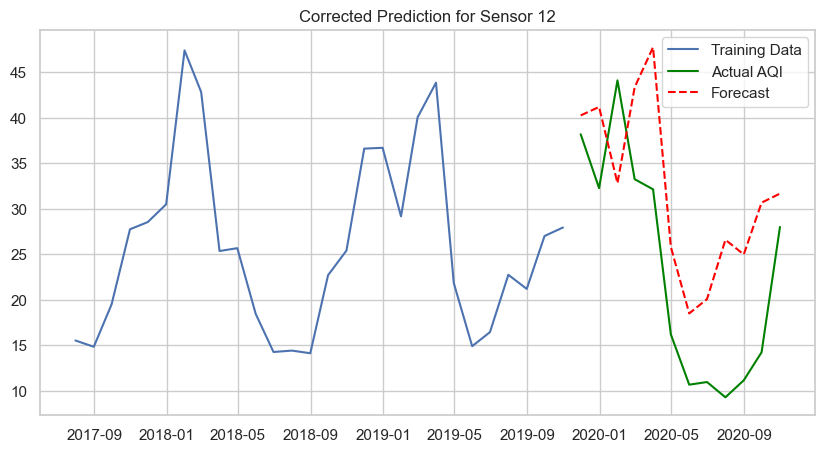

In [16]:
# ... existing imports ...
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

for sensor in stable_sensors:
    # --- STEP 1: CLEANING (Crucial Check) ---
    df_clean = df.dropna(subset=[sensor])
    
    # FILTER OUTLIERS: If data has error codes like 9999, remove them
    # Assuming AQI shouldn't be above 1000 usually. Adjust if needed.
    df_clean = df_clean[df_clean[sensor] < 2000] 

    df_resampled = df_clean[sensor].resample('ME').mean()
    
    # Fill any gaps created by resampling (SARIMA hates NaNs)
    data = df_resampled.interpolate()

    # --- STEP 2: SPLIT ---
    train_data = data.iloc[:-12]
    test_data = data.iloc[-12:]

    # --- STEP 3: SAFER MODEL ---
    # Changed (2,1,3) -> (1,1,1). This is much more stable.
    # Enforce stationarity=True ensures the model doesn't explode.
    model = SARIMAX(train_data, 
                order=(2, 1, 1),              
                seasonal_order=(0, 1, 0, 12), 
                enforce_stationarity=True,  
                enforce_invertibility=True)

    results = model.fit(disp=False)

    # --- STEP 4: PREDICT ---
    forecast_object = results.get_forecast(steps=12)
    prediction = forecast_object.predicted_mean
    prediction.index = test_data.index 

    # --- STEP 5: ERRORS ---
    mae = mean_absolute_error(test_data, prediction)
    rmse = np.sqrt(mean_squared_error(test_data, prediction))
    
    # Protection against divide by zero for MAPE
    mape = np.mean(np.abs((test_data - prediction) / (test_data + 1e-10))) * 100

    print(f"--- Errors for Sensor {sensor} ---")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print("--------------------------------------")

    # --- STEP 6: PLOT ---
    plt.figure(figsize=(10, 5))
    plt.plot(train_data.index, train_data, label='Training Data')
    plt.plot(test_data.index, test_data, label='Actual AQI', color='green')
    plt.plot(prediction.index, prediction, label='Forecast', color='red', linestyle='--')
    plt.title(f'Corrected Prediction for Sensor {sensor}')
    plt.legend()
    plt.show()